<a href="https://colab.research.google.com/github/EfanovNikita/prediction_price/blob/master/japan_cars_prediction_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv

--2025-04-16 07:12:03--  https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136735 (134K) [text/csv]
Saving to: ‘japan_cars_dataset.csv’

japan_cars_dataset. 100%[===================>] 133.53K   314KB/s    in 0.4s    

2025-04-16 07:12:04 (314 KB/s) - ‘japan_cars_dataset.csv’ saved [136735/136735]



In [ ]:
from keras.models import Sequential, Model

from keras.layers import Dense, Input

from keras.optimizers import Adam

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
import pandas as pd
cars = pd.read_csv('japan_cars_dataset.csv', sep=',')

# Удалим строки с пустыми значениями
cars = cars.dropna()
cars.head(10)

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [ ]:
from keras import utils
import numpy as np

cars = cars.drop(columns=['Unnamed: 0'])
cars = cars.sample(frac=1)
cars.info()
cars.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2318 entries, 637 to 1882
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
 6   transmission     2318 non-null   object
 7   drive            2318 non-null   object
 8   hand_drive       2318 non-null   object
 9   fuel             2318 non-null   object
dtypes: int64(4), object(6)
memory usage: 199.2+ KB


,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
637,790,honda,fit,2004,109000,1300,at,2wd,rhd,gasoline
1337,1080,toyota,vitz,2006,36000,1300,at,2wd,rhd,gasoline
1749,1220,toyota,vitz,2009,25000,990,at,2wd,rhd,gasoline
895,900,toyota,ractis,2009,197000,1300,at,2wd,rhd,gasoline
149,489,nissan,march,2011,48000,1200,at,2wd,rhd,gasoline


**Исследуем данные**

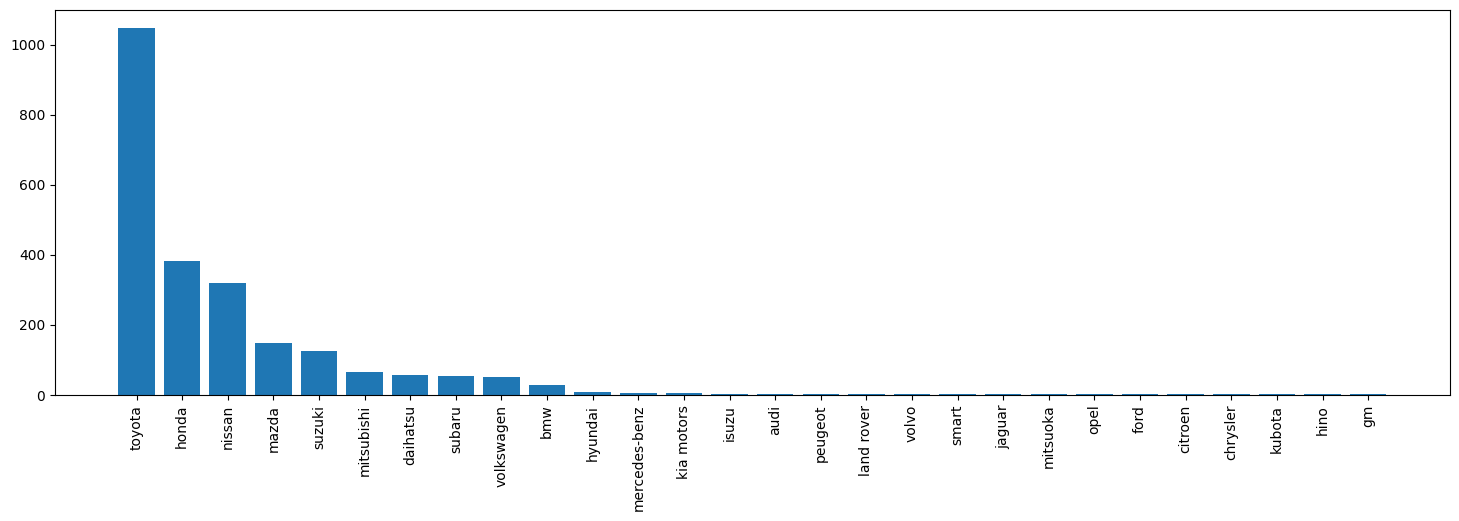

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(cars['mark'].value_counts().index, cars['mark'].value_counts())
ax.tick_params(axis='x', rotation=90)

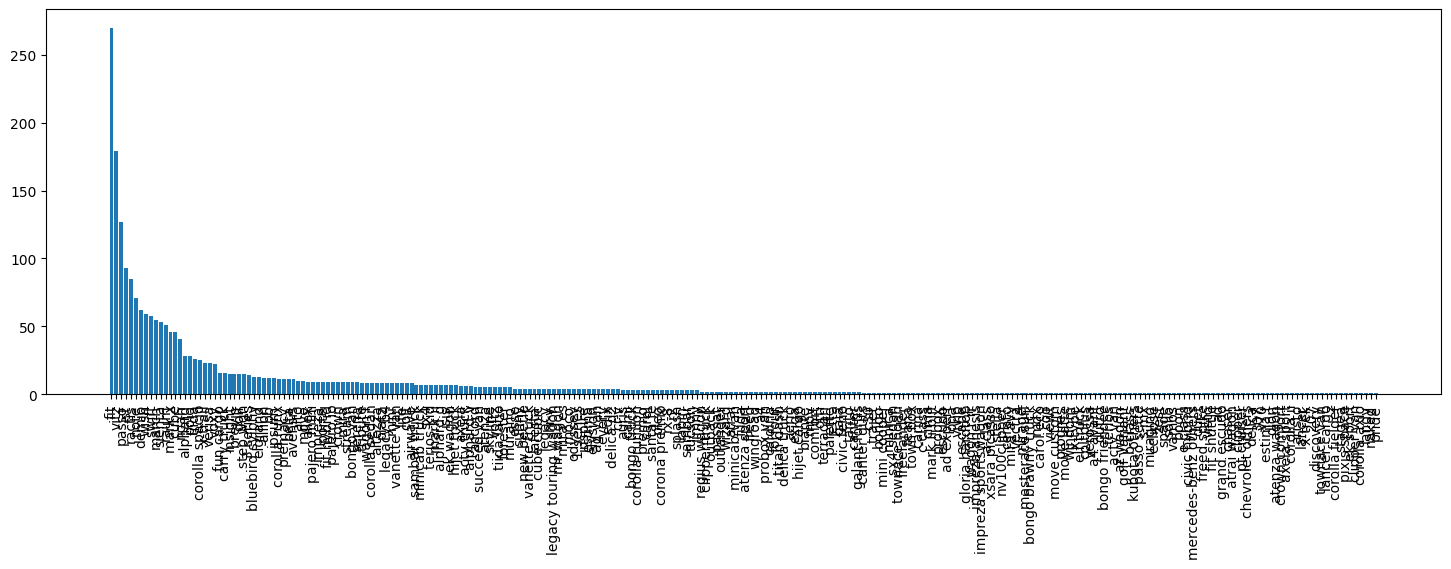

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(cars['model'].value_counts().index, cars['model'].value_counts())
ax.tick_params(axis='x', rotation=90)

<BarContainer object of 3 artists>

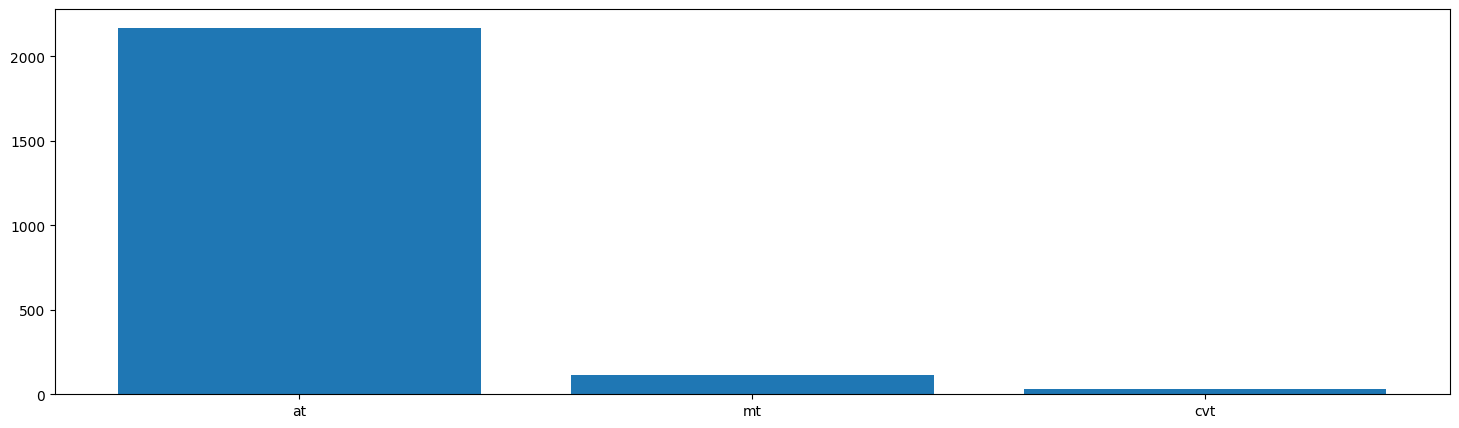

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(cars['transmission'].value_counts().index, cars['transmission'].value_counts())

<BarContainer object of 3 artists>

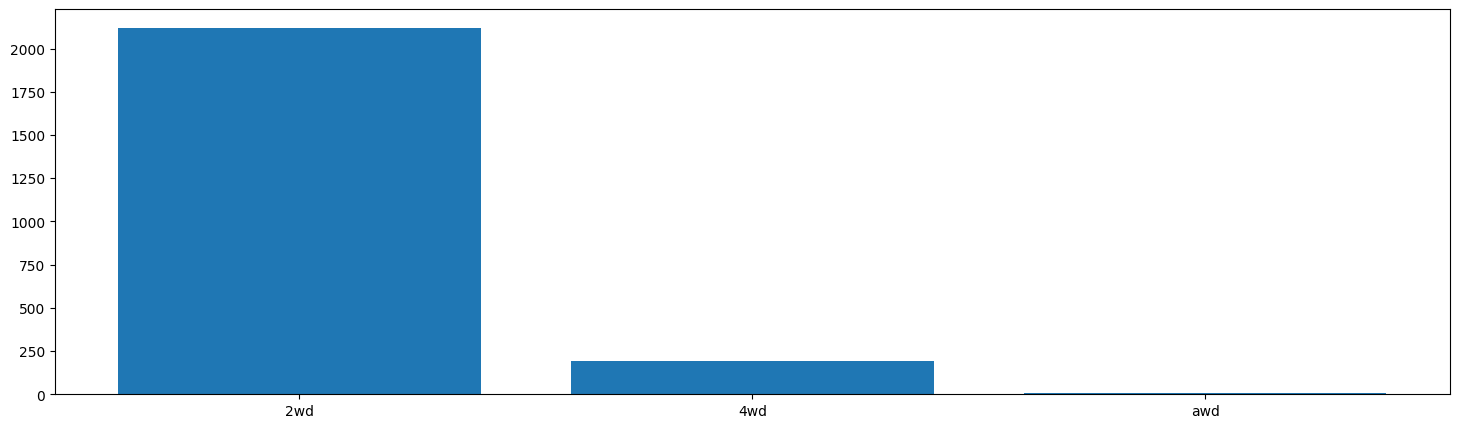

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(cars['drive'].value_counts().index, cars['drive'].value_counts())

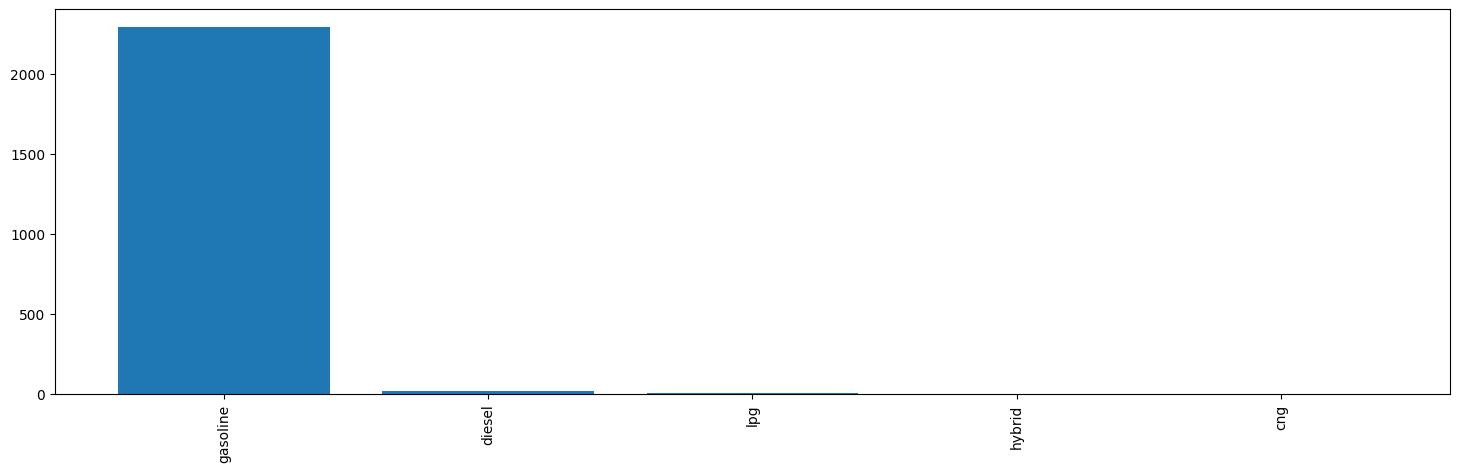

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(cars['fuel'].value_counts().index, cars['fuel'].value_counts())
ax.tick_params(axis='x', rotation=90)

Text(0.5, 0, 'price')

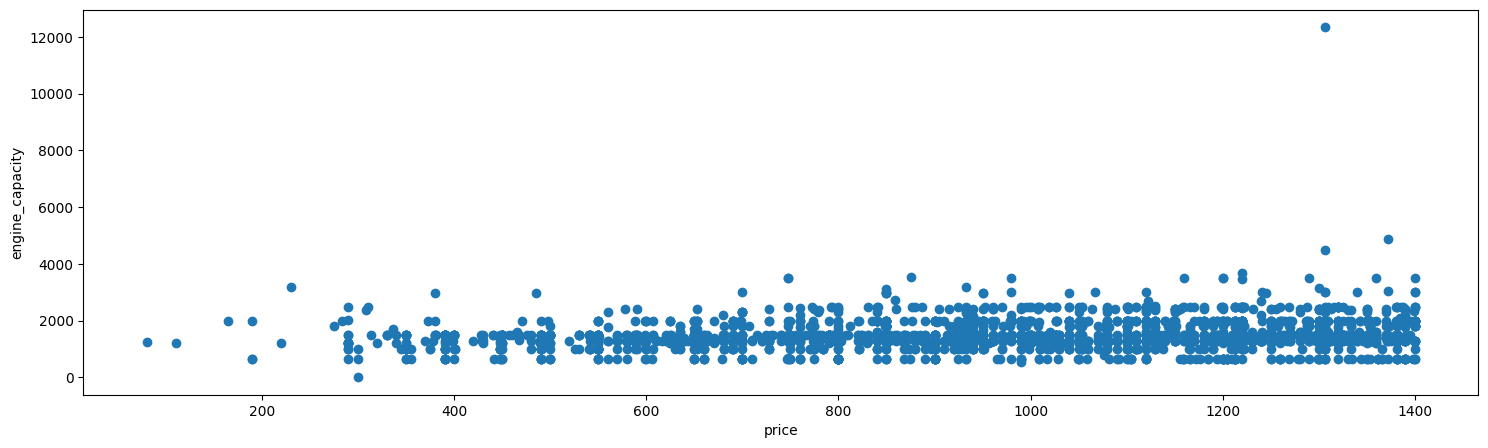

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(cars['price'], cars['engine_capacity'])
ax.set_ylabel('engine_capacity')
ax.set_xlabel('price')

Text(0, 0.5, 'price')

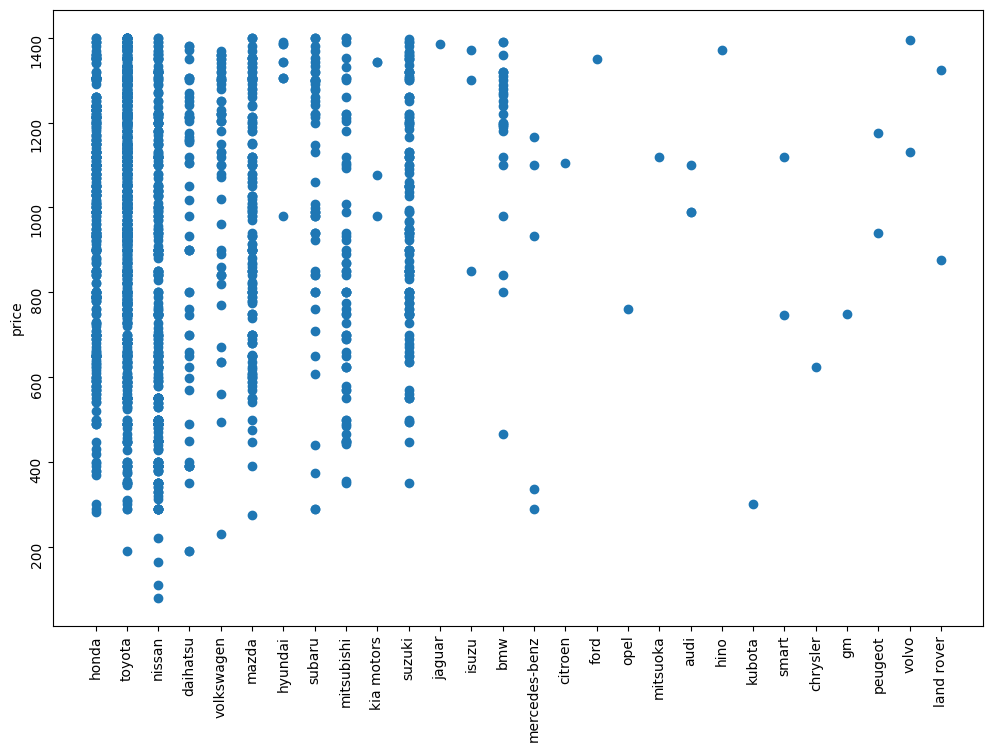

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(cars['mark'], cars['price'])
ax.tick_params(rotation=90)
ax.set_ylabel('price')

Text(0, 0.5, 'price')

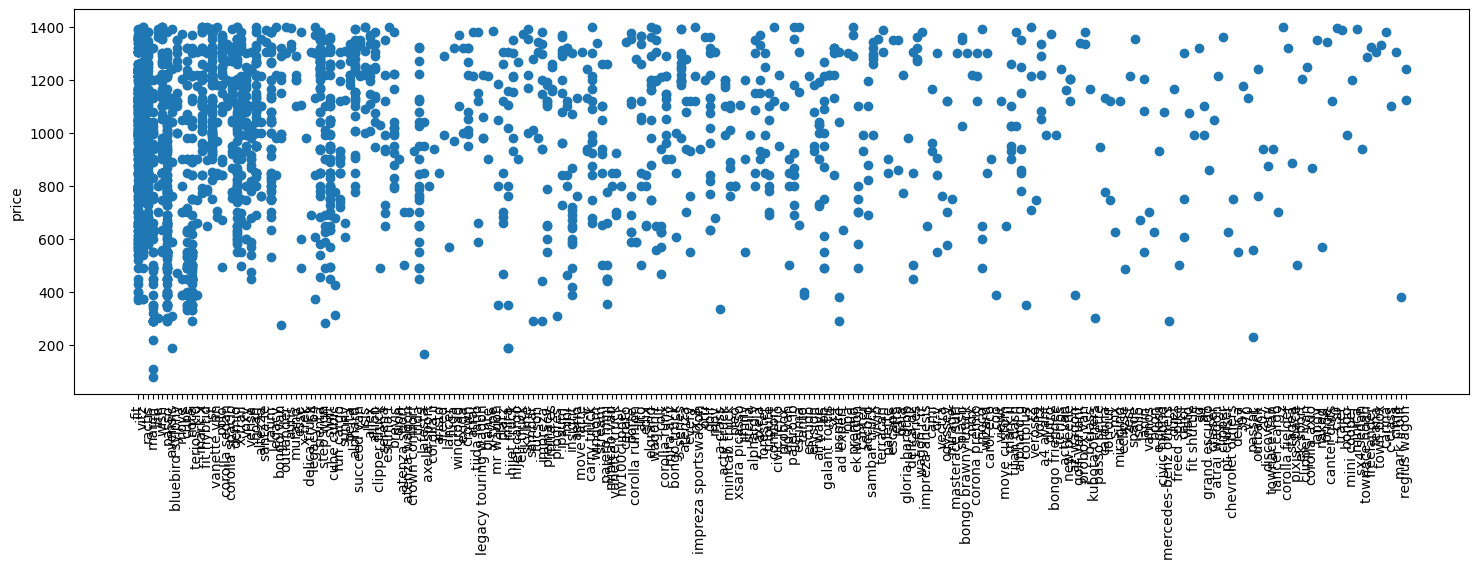

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(cars['model'], cars['price'])
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('price')

Text(0, 0.5, 'price')

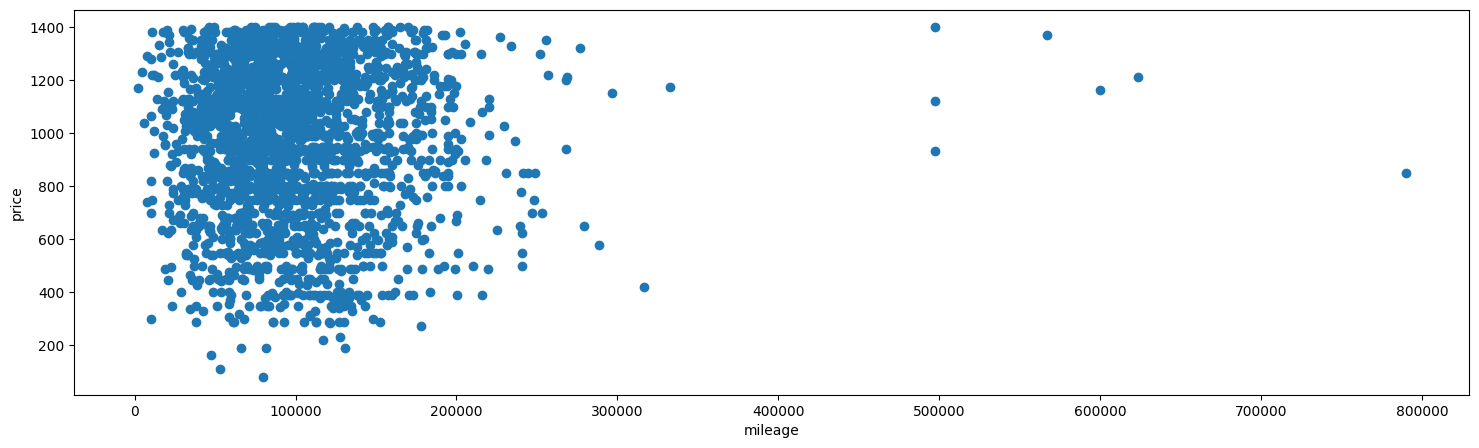

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(cars['mileage'], cars['price'])
ax.set_xlabel('mileage')
ax.set_ylabel('price')

Text(0, 0.5, 'price')

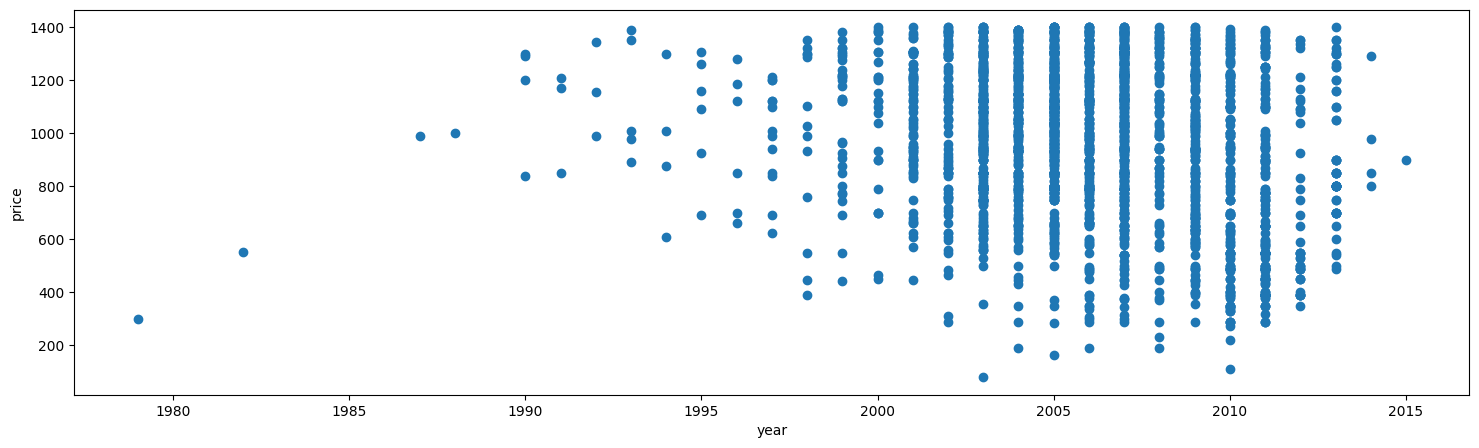

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.scatter(cars['year'], cars['price'])
ax.set_xlabel('year')
ax.set_ylabel('price')

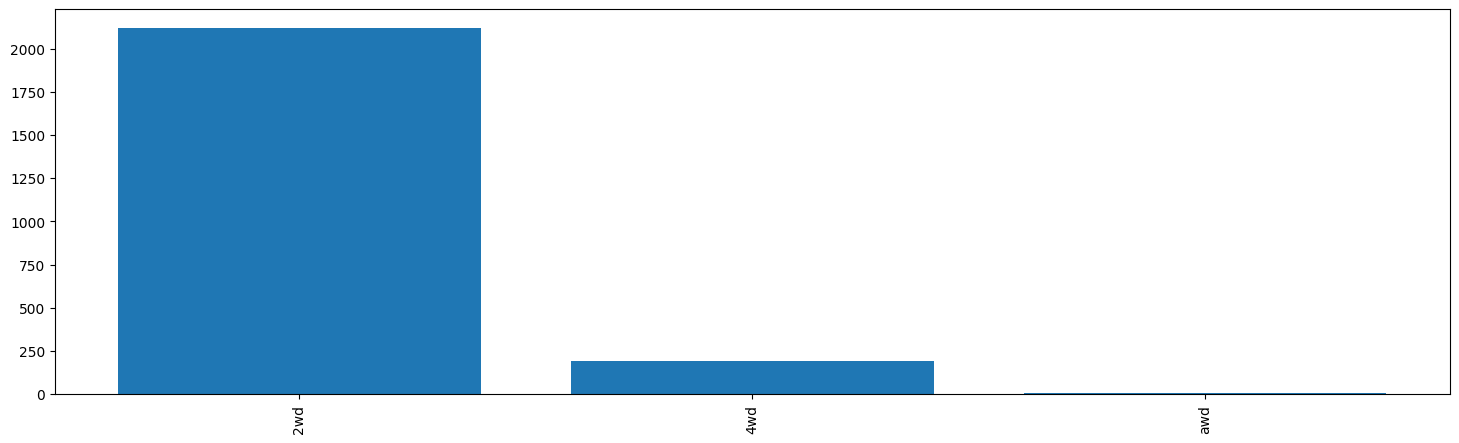

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(cars['drive'].value_counts().index, cars['drive'].value_counts())
ax.tick_params(axis='x', rotation=90)

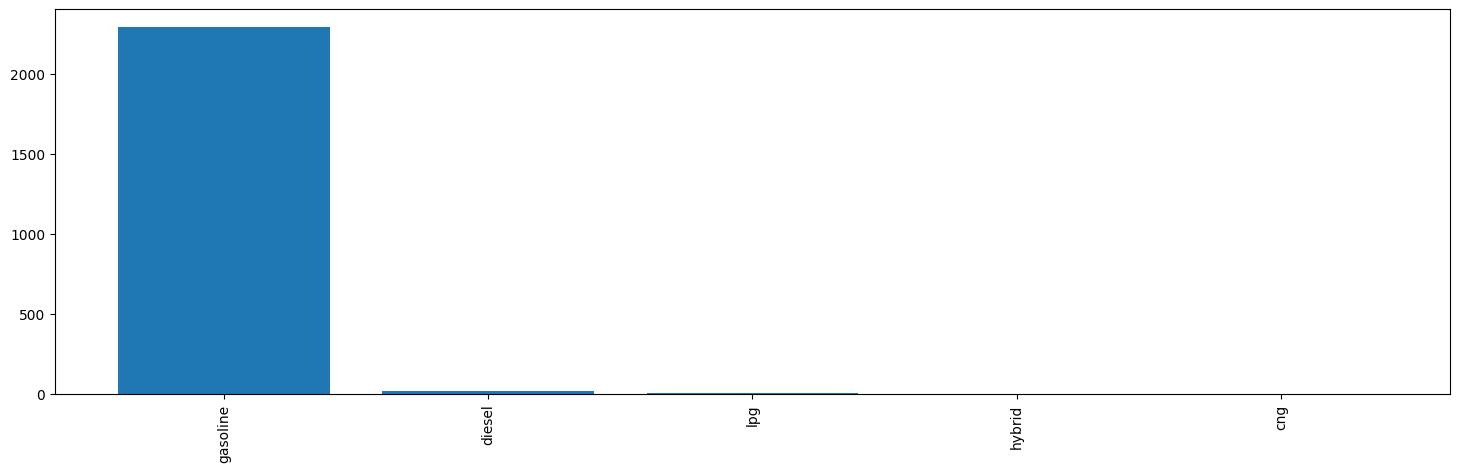

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.bar(cars['fuel'].value_counts().index, cars['fuel'].value_counts())
ax.tick_params(axis='x', rotation=90)

In [ ]:
def str_to_OHE(string, classes):
    '''One hot encoding строки
    @string: строка для преобразования
    @classes: список классов
    @return: закодированная строка
    '''
    num_classes = len(classes)+1
    idx = num_classes
    if string in classes:
        idx = classes.index(string)
    return utils.to_categorical(idx, num_classes)

In [ ]:
def number_to_OHE(number, classes):
    '''One hot encoding чисел
    @string: число для преобразования
    @classes: список классов
    @return: закодированное число
    '''
    idx = len(classes) - 1
    for i, y in enumerate(classes):
        if number < y:
            idx = i
            break
    return utils.to_categorical(idx, len(classes))

In [ ]:
# Создаем списки классов и кодируем значения
transmission_class = list(cars['transmission'].unique())
drive_class = list(cars['drive'].unique())
fuel_class = list(cars['fuel'].unique())
mark_cl = list(cars['mark'].unique())
model_cl = list(cars['model'].unique())
year_class = list(range(1985, 2015, 5))
engine_capacity_class = list(range(500, 5000, 500))
mileage_class = list(range(cars['mileage'].unique().min(), cars['mileage'].unique().max(), 1000))

x_data = []
y_data = []

for i, row in cars.iterrows():
    x = np.hstack([
        str_to_OHE(row['mark'], mark_cl),
        str_to_OHE(row['model'], model_cl),
        number_to_OHE(row['year'], year_class),
        number_to_OHE(row['mileage'], mileage_class),
        number_to_OHE(row['engine_capacity'], engine_capacity_class),
        str_to_OHE(row['transmission'], transmission_class),
        str_to_OHE(row['drive'], drive_class),
        str_to_OHE(row['fuel'], fuel_class),
    ])

    y = np.array([row['price']]) / 1000

    x_data.append(x)
    y_data.append(y)


In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, shuffle=True, random_state=94, train_size=0.8)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, shuffle=True, random_state=94, train_size=0.5)

In [ ]:
model = Sequential([
    Input((x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(1e-5), loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=32)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0505 - mae: 0.9823 - val_loss: 1.1167 - val_mae: 1.0102
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9957 - mae: 0.9556 - val_loss: 1.0735 - val_mae: 0.9887
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9562 - mae: 0.9325 - val_loss: 1.0332 - val_mae: 0.9683
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9382 - mae: 0.9247 - val_loss: 0.9951 - val_mae: 0.9485
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8803 - mae: 0.8913 - val_loss: 0.9583 - val_mae: 0.9290
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8583 - mae: 0.8780 - val_loss: 0.9221 - val_mae: 0.9094
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8326 - mae: 0.8626 - val_loss: 0.8863 - val_mae: 0.8896
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7945 - mae: 0.8443 - val_loss: 0.8509 - val_mae: 0.8697
Epoch 9/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.745

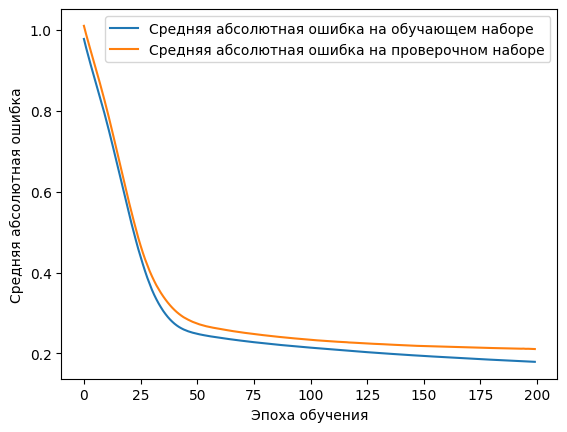

In [ ]:
plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

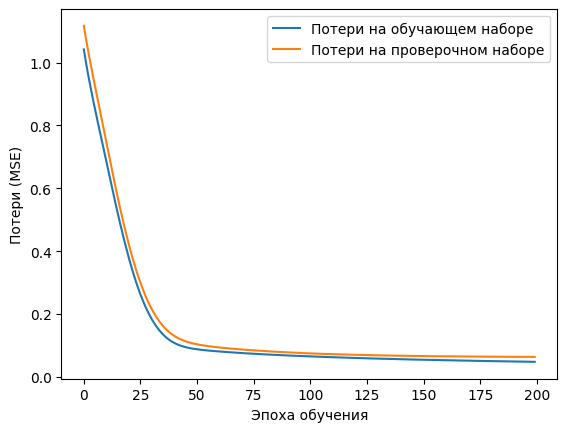

In [ ]:
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери (MSE)')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Среднеквадратическая ошибка: 0.0751 

Реальное значение:   1.24  Предсказанное значение:   0.82  Разница:   0.42
Реальное значение:   0.60  Предсказанное значение:   1.11  Разница:   0.51
Реальное значение:   0.70  Предсказанное значение:   0.97  Разница:   0.27
Реальное значение:   0.90  Предсказанное значение:   0.95  Разница:   0.05
Реальное значение:   0.58  Предсказанное значение:   0.62  Разница:   0.04
Реальное значение:   0.84  Предсказанное значение:   0.83  Разница:   0.01
Реальное значение:   1.24  Предсказанное значение:   1.10  Разница:   0.14
Реальное значение:   1.12  Предсказанное значение:   0.88  Разница:   0.24
Реальное значение:   0.85  Предсказанное значение:   1.06  Разница:   0.21
Реальное значение:   0.79  Предсказанное значение:   0.90  Разница:   0.11


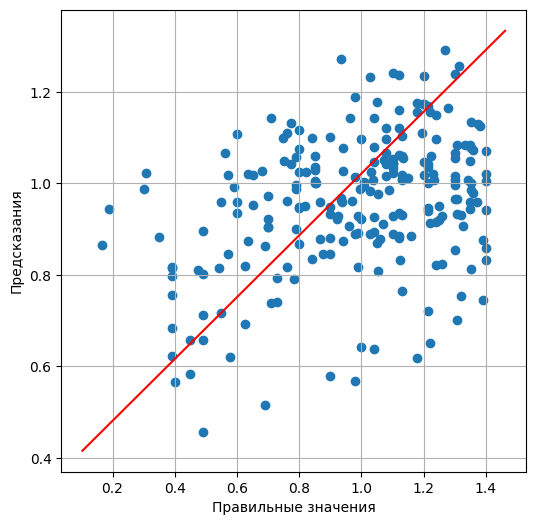

In [ ]:
pred = model.predict(x_test)

y_test = y_test.reshape(pred.shape)

print('Среднеквадратическая ошибка:', f'{mean_squared_error(pred, y_test):.4f}', '\n')

for i in range(10):
    print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(y_test[i, 0],
                                                                                                pred[i, 0],
                                                                                                abs(y_test[i, 0] - pred[i, 0])))

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(y_test, pred)
ax.plot(plt.xlim(), plt.ylim(), 'r')
plt.xlabel('Правильные значения')
plt.ylabel('Предсказания')
plt.grid()
plt.show()

У данной модели мы достигли среднеквадратичной ошибки в 7% на тестовой выборке. Чтобы улучшить результат можно поробовать избавиться от выбросов в данных, изменить архитектуру модели.